# HAT-P-26

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import astropy.units as u

In [3]:
name = 'HAT-P-26'

In [4]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
fnames = np.sort(fnames)
obs = om.Observation.from_files(fnames)

In [5]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

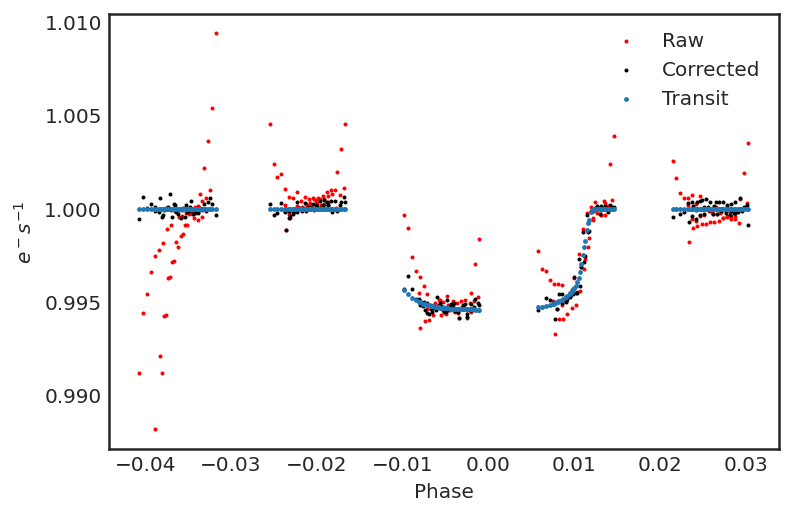

In [6]:
obs.plot()

In [7]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/3 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  33%|███▎      | 1/3 [00:10<00:21, 10.58s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 2/3 [00:20<00:10, 10.18s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:31<00:00, 10.63s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:31<00:00, 10.55s/it]

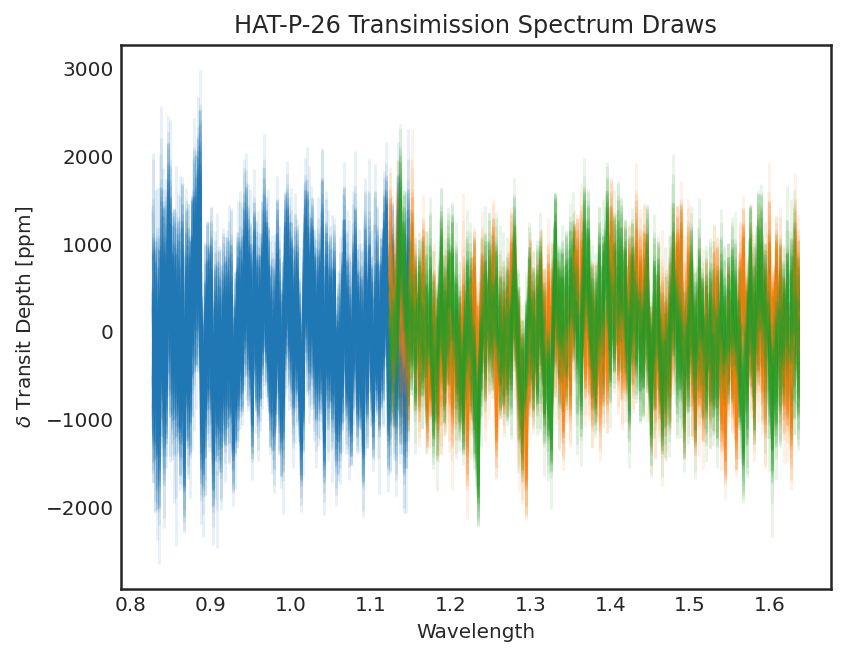

In [8]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HAT-P-26 Transmission Spectrum, Visit: 3'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

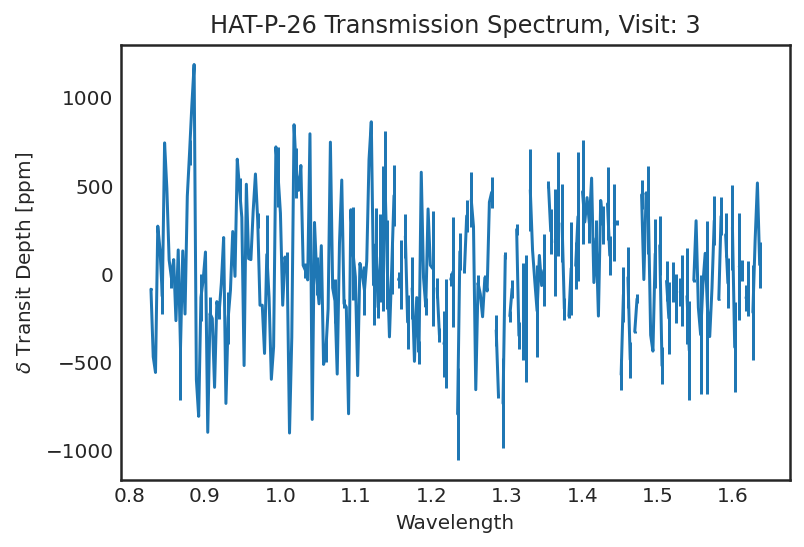

In [9]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 300)).plot()

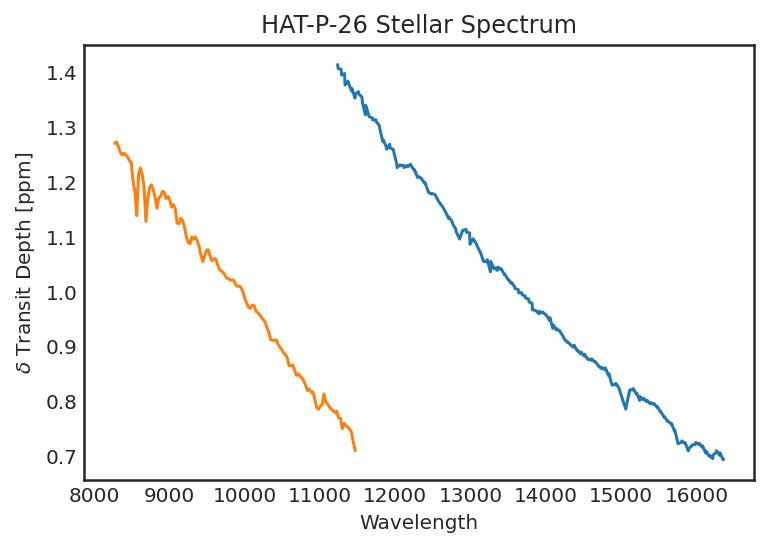

In [10]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [11]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

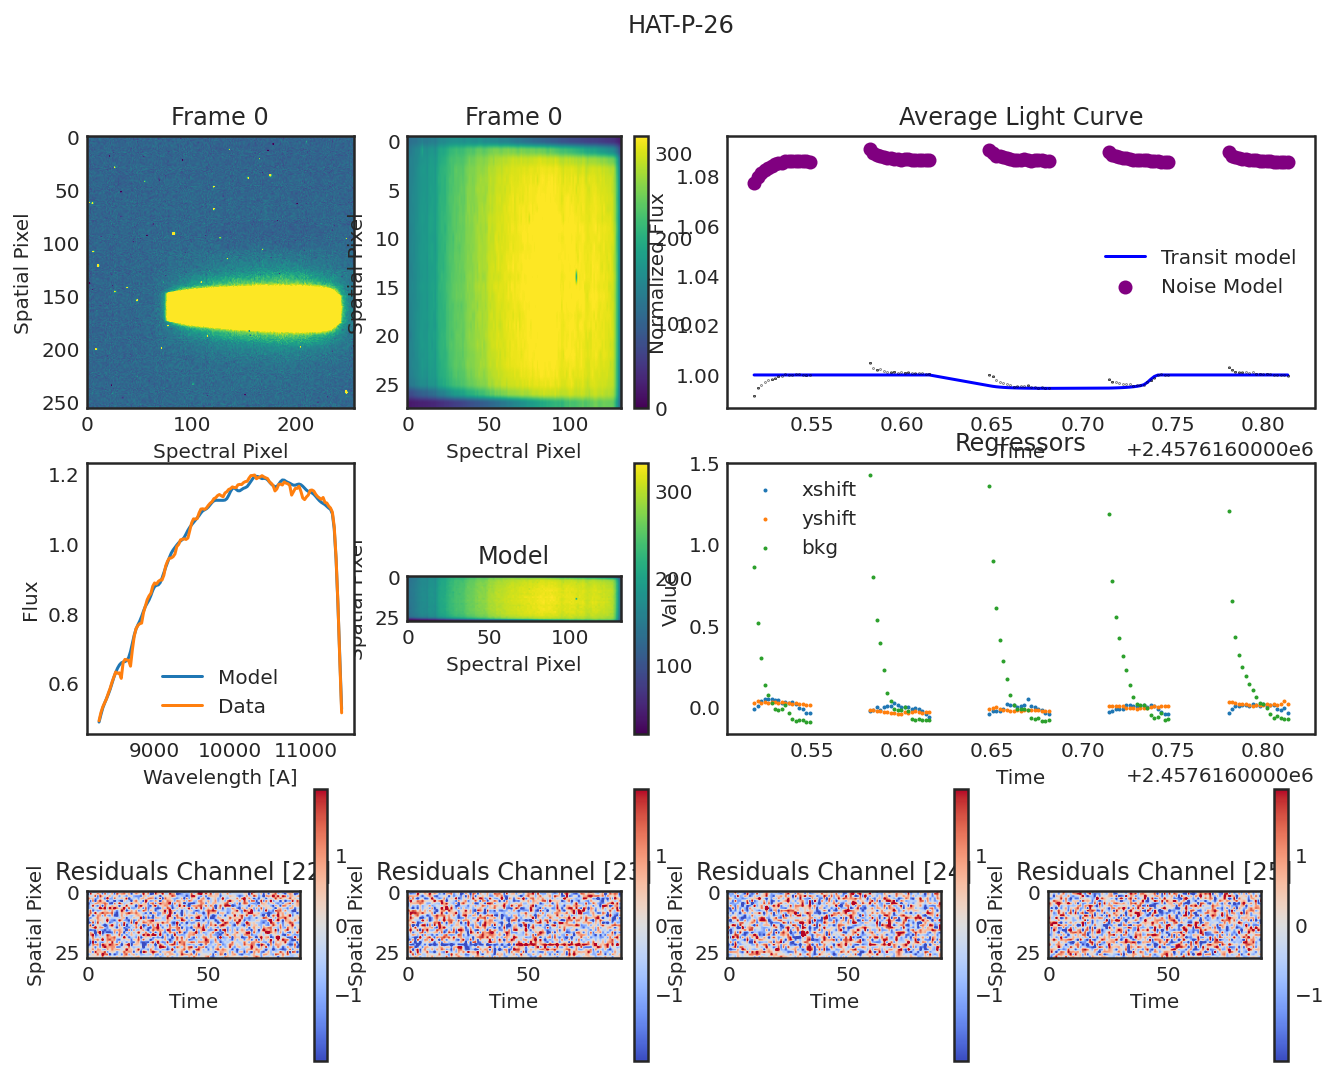

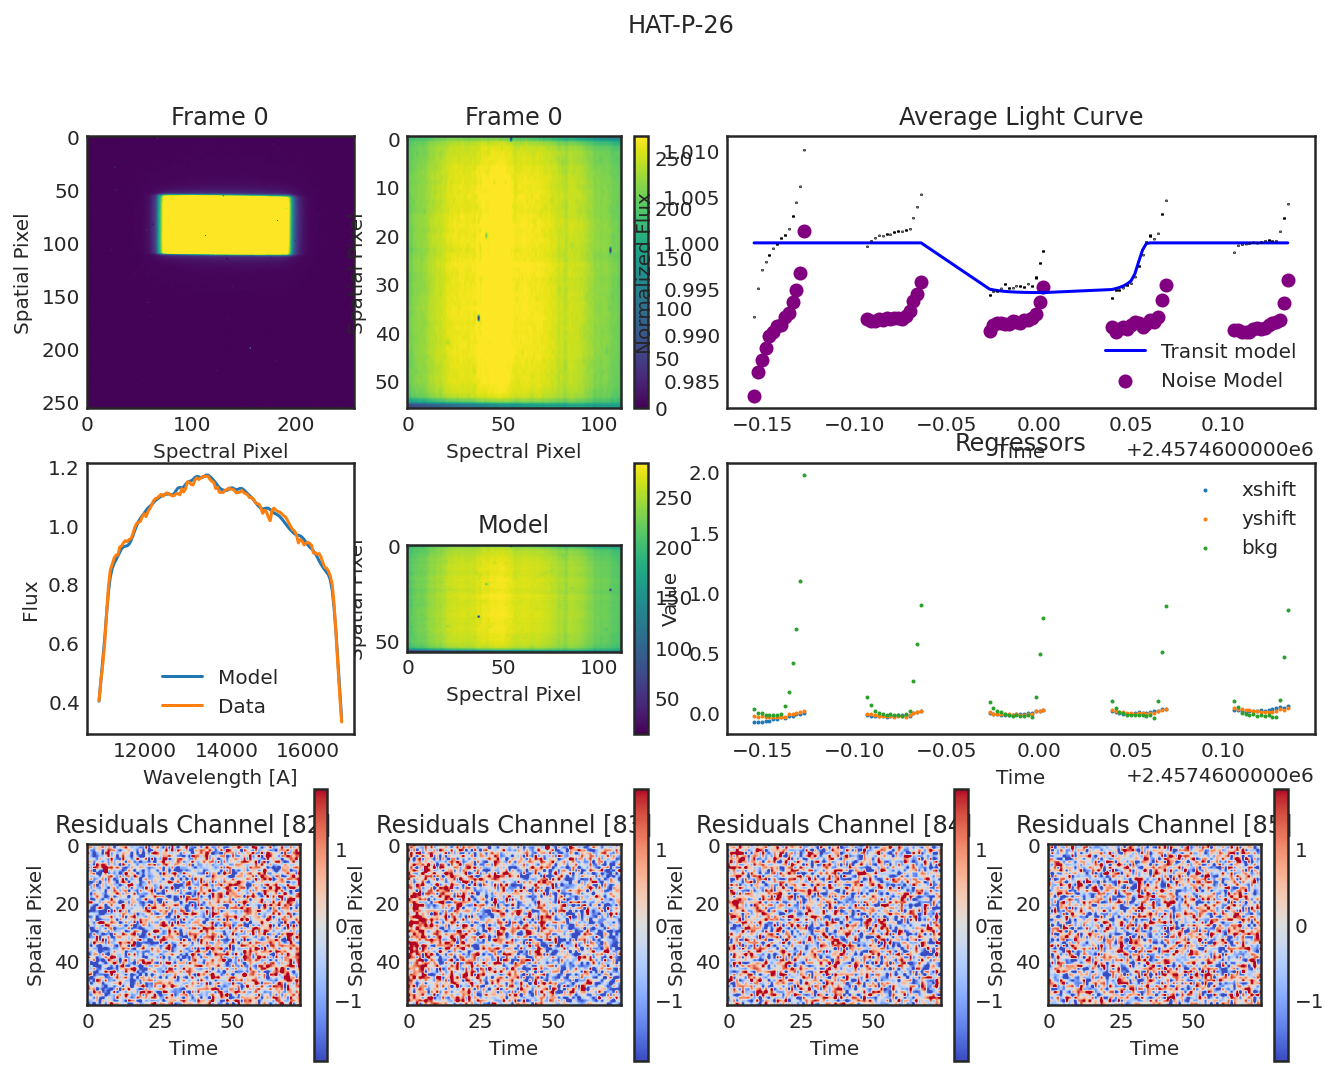

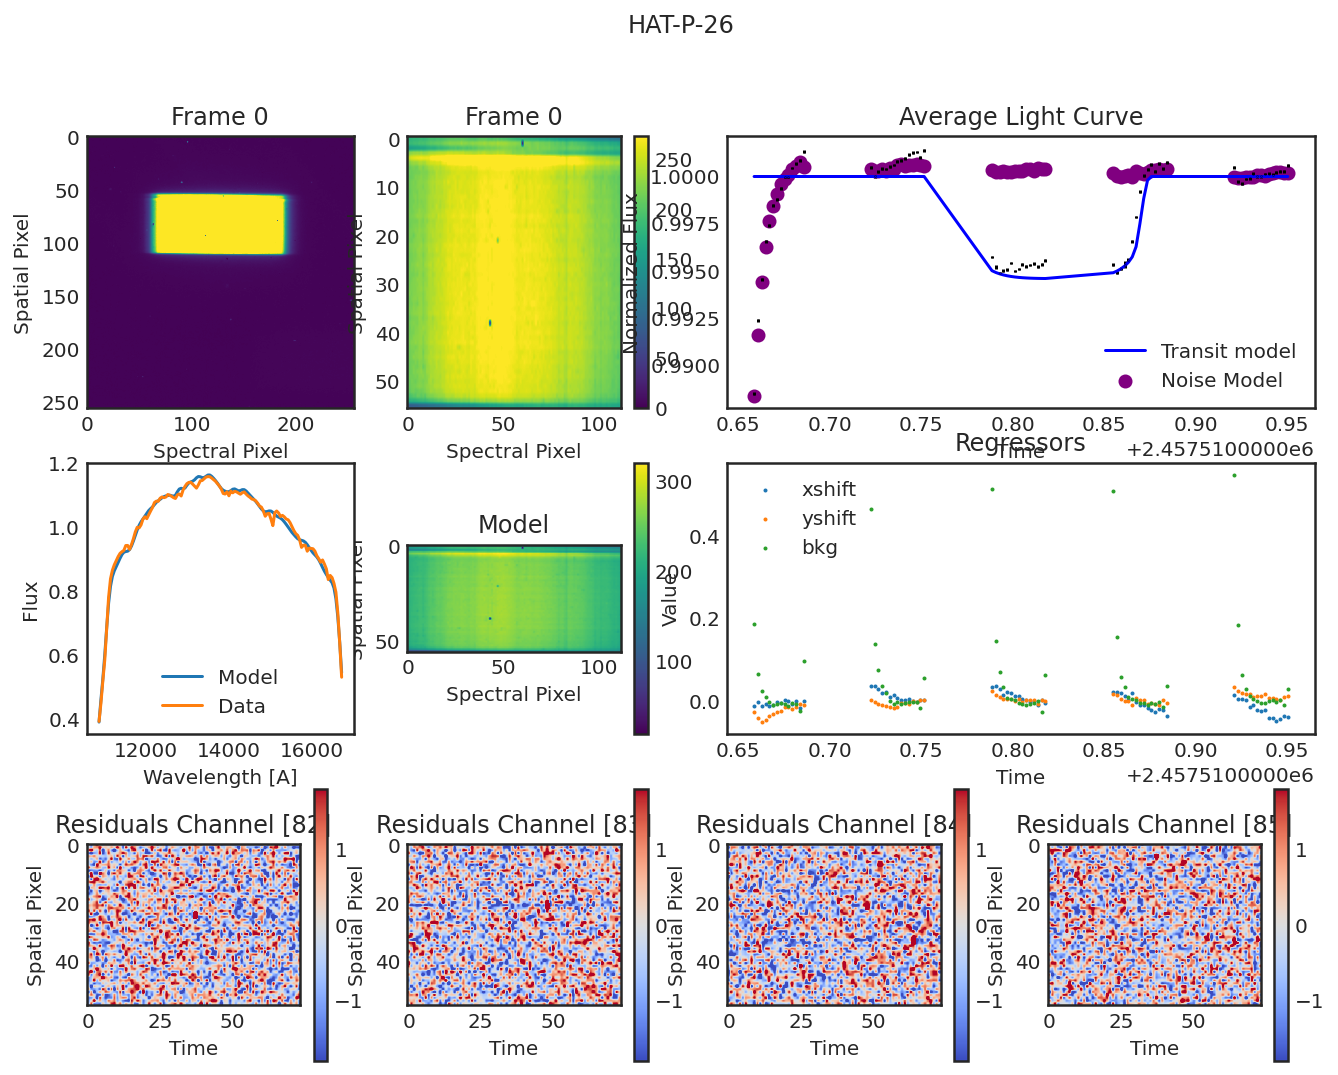

In [12]:
for visit in obs:
    visit.diagnose();
    plt.show();